In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Scikit-learn (often abbreviated as sklearn) is a widely-used open-source machine learning library for Python. It provides simple and efficient tools for data mining, data analysis, and machine learning, making it accessible to both beginners and experts

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode # identifying the most common value in a dataset.
from sklearn.preprocessing import LabelEncoder #convert categorical data (labels) into numerical form
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

%matplotlib inline
#magic command is used in Jupyter notebooks to display Matplotlib plots directly within the notebook

In [76]:
data_path = 'https://drive.google.com/uc?export=download&id=1ZaMK1OOMhm5LHICRsuScnVGK_n6tahYy'
df=pd.read_csv(data_path)

In [77]:
# Checking whether the dataset is balanced or not
disease_counts= df['prognosis'].value_counts()
temp_df=pd.DataFrame({'Disease':disease_counts.index,'Counts': disease_counts.values})
print(temp_df)

                                    Disease  Counts
0                          Fungal infection     120
1                               Hepatitis C     120
2                               Hepatitis E     120
3                       Alcoholic hepatitis     120
4                              Tuberculosis     120
5                               Common Cold     120
6                                 Pneumonia     120
7              Dimorphic hemmorhoids(piles)     120
8                              Heart attack     120
9                            Varicose veins     120
10                           Hypothyroidism     120
11                          Hyperthyroidism     120
12                             Hypoglycemia     120
13                          Osteoarthristis     120
14                                Arthritis     120
15  (vertigo) Paroymsal  Positional Vertigo     120
16                                     Acne     120
17                  Urinary tract infection     120
18          

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'Fungal infection'),
  Text(1, 0, 'Hepatitis C'),
  Text(2, 0, 'Hepatitis E'),
  Text(3, 0, 'Alcoholic hepatitis'),
  Text(4, 0, 'Tuberculosis'),
  Text(5, 0, 'Common Cold'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Dimorphic hemmorhoids(piles)'),
  Text(8, 0, 'Heart attack'),
  Text(9, 0, 'Varicose veins'),
  Text(10, 0, 'Hypothyroidism'),
  Text(11, 0, 'Hyperthyroidism'),
  Text(12, 0, 'Hypoglycemia'),
  Text(13, 0, 'Osteoarthristis'),
  Text(14, 0, 'Arthritis'),
  Text(15, 0, '(vertigo) Paroymsal  Positional Vertigo'),
  Text(16, 0, 'Acne'),
  Text(17, 0, 'Urinary tract infection'),
  Text(18, 0, 'Psoriasis'),
  Text(19, 0, 'Hepatitis D'),
  Text(20, 0, 'Hepatitis B'),
  Text(21, 0, 'Allergy'),
  Text(22, 0, 'hepatitis A'),
  Text(23, 0,

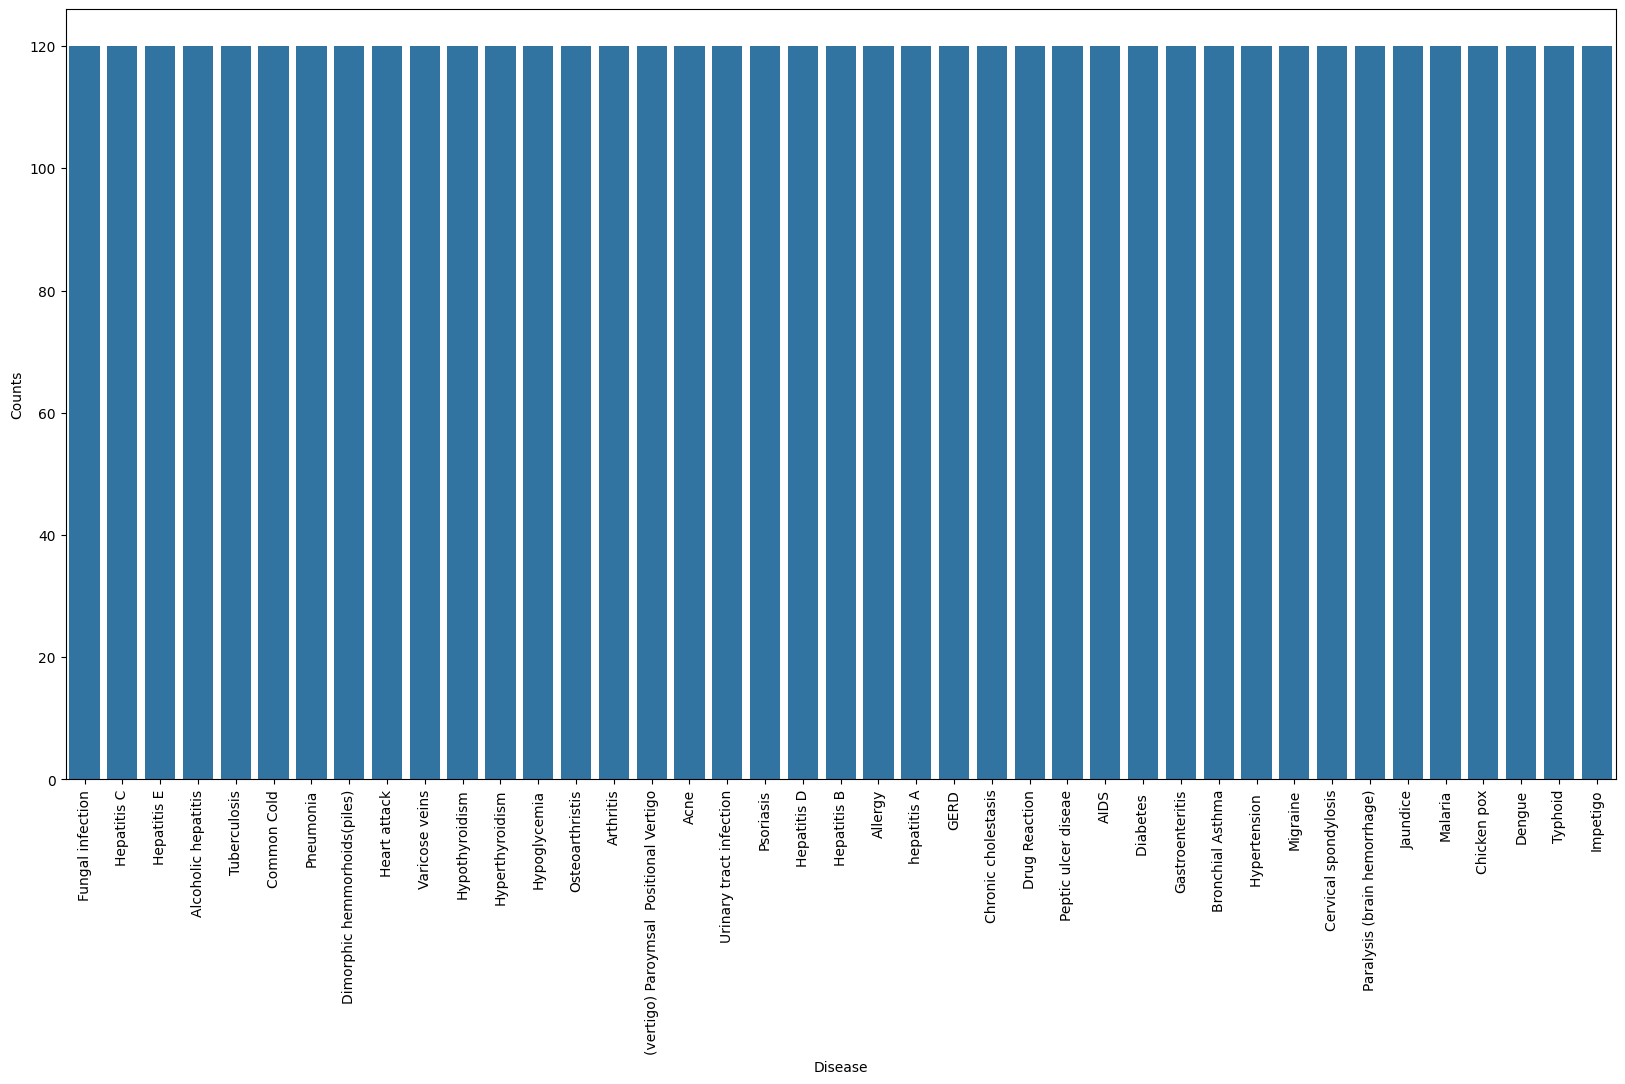

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)

In [93]:
df.drop(columns=["Unnamed: 133"], inplace=True)

print(df.columns)

KeyError: "['Unnamed: 133'] not found in axis"

In [94]:
print(df["prognosis"].unique())
print(df["prognosis"].head(10))


[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]
0    15
1    15
2    15
3    15
4    15
5    15
6    15
7    15
8    15
9    15
Name: prognosis, dtype: int64


In [80]:
#cheaking missing values
print(df["prognosis"].isna().sum())

0


In [87]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder=LabelEncoder()
df["prognosis"]=encoder.fit_transform(df["prognosis"])

In [88]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=24)

print(f'Train:{X_train.shape},{Y_train.shape}')
print(f'Train:{X_test.shape},{Y_test.shape}')

Train:(3936, 132),(3936,)
Train:(984, 132),(984,)


In [89]:
print(Y.head())

0    15
1    15
2    15
3    15
4    15
Name: prognosis, dtype: int64


#Model Building

After splitting the data, we will be now working on the modeling part. We will be using K-Fold cross-validation to evaluate the machine-learning models. We will be using Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier for cross-validation. Before moving into the implementation part let us get familiar with k-fold cross-validation and the machine learning models.

***K-Fold Cross-Validation:*** K-Fold cross-validation is one of the cross-validation techniques in which the whole dataset is split into k number of subsets, also known as folds, then training of the model is performed on the k-1 subsets and the remaining one subset is used to evaluate the model performance.


In [90]:
# Defining scoring metric for k-fold cross validation
def cv_scores(estimator,X,Y):
  return accuracy_score(Y,estimator.predict(X))

In [91]:
# Initializing Models
models={
    'SVC':SVC(),
    'Gaussian NB':GaussianNB(),
    'random Forest':RandomForestClassifier(random_state=18)
}

In [92]:
# Producing cross validation score for the models
for model_name in models:
  model=models[model_name]
  scores=cross_val_score(model,X,Y,cv=10,n_jobs=-1,scoring = cv_scores)
  #n_jobs=-1 uses all available CPUs for parallel processing.

  print("=="*30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0



***Support Vector Classifier:*** Support Vector Classifier is a discriminative classifier i.e. when given a labeled training data, the algorithm tries to find an optimal hyperplane that accurately separates the samples into different categories in hyperspace.

In [102]:
svm_model=SVC()
svm_model.fit(X_train,Y_train)
preds=svm_model.predict(X_test)


In [109]:
accuracy=accuracy_score(Y_train,svm_model.predict(X_train))
print("Accuracy on train data :" ,accuracy*100)

Accuracy on train data : 100.0


In [110]:
accuracy=accuracy_score(Y_test,preds)
print("Accuracy on test data :",accuracy*100)

Accuracy on test data : 100.0


Text(0.5, 1.0, 'Confusion Matrix for SVM Classifier on Test Data')

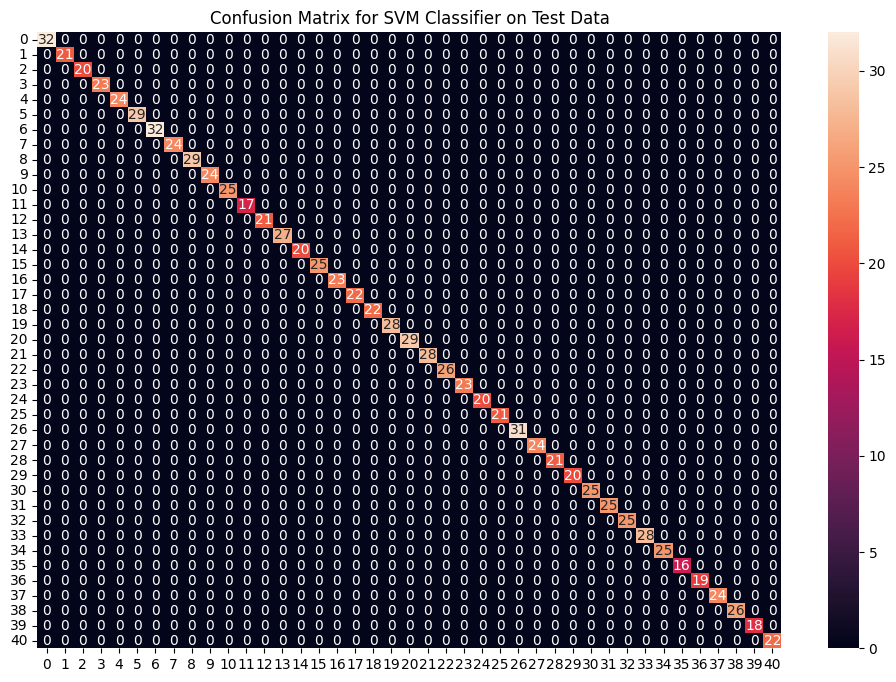

In [112]:
cf_matrix=confusion_matrix(Y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")

***Gaussian Naive Bayes Classifier:*** It is a probabilistic machine learning algorithm that internally uses Bayes Theorem to classify the data points.


In [113]:
nb_model=GaussianNB()
nb_model.fit(X_train,Y_train)
preds=nb_model.predict(X_test)


In [114]:
accuracy=accuracy_score(Y_train,nb_model.predict(X_train))
print("Accuracy on train data :" ,accuracy*100)

Accuracy on train data : 100.0


In [115]:
accuracy=accuracy_score(Y_test,preds)
print("Accuracy on test data :" ,accuracy*100)

Accuracy on test data : 100.0


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Classifier on Test Data')

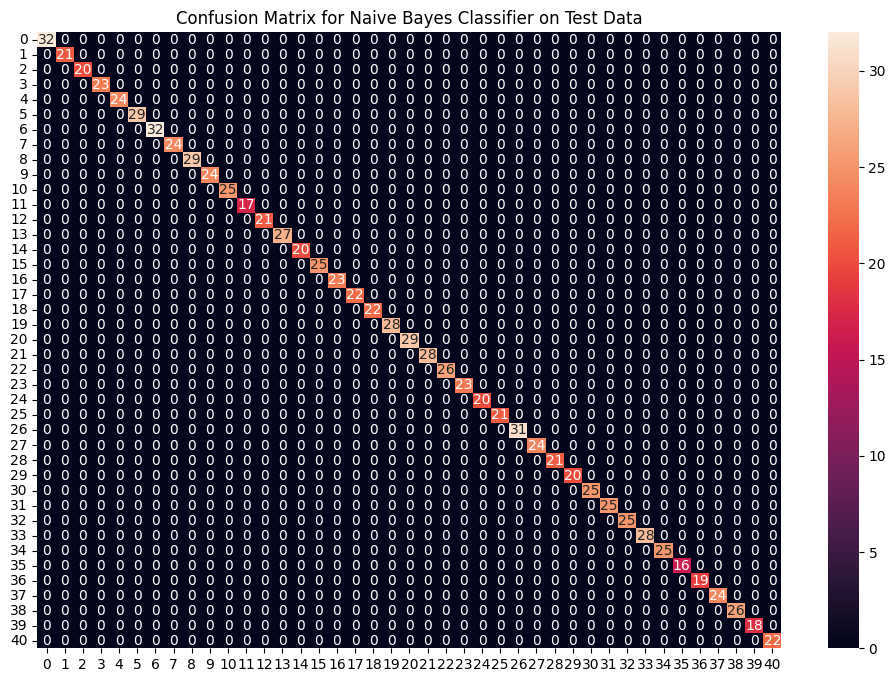

In [116]:
cf_matrix=confusion_matrix(Y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")

***Random Forest Classifier:*** Random Forest is an ensemble learning-based supervised machine learning classification algorithm that internally uses multiple decision trees to make the classification. In a random forest classifier, all the internal decision trees are weak learners, and the outputs of these weak decision trees are combined i.e. mode of all the predictions is as the final prediction.

In [117]:
rf_model=RandomForestClassifier(random_state=18)
rf_model.fit(X_train,Y_train)
preds=rf_model.predict(X_test)

In [118]:
accuracy=accuracy_score(Y_train,rf_model.predict(X_train))
print("Accuracy on train data :" ,accuracy*100)

Accuracy on train data : 100.0


In [119]:
accuracy=accuracy_score(Y_test,preds)
print("Accuracy on test data :" ,accuracy*100)

Accuracy on test data : 100.0


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Classifier on Test Data')

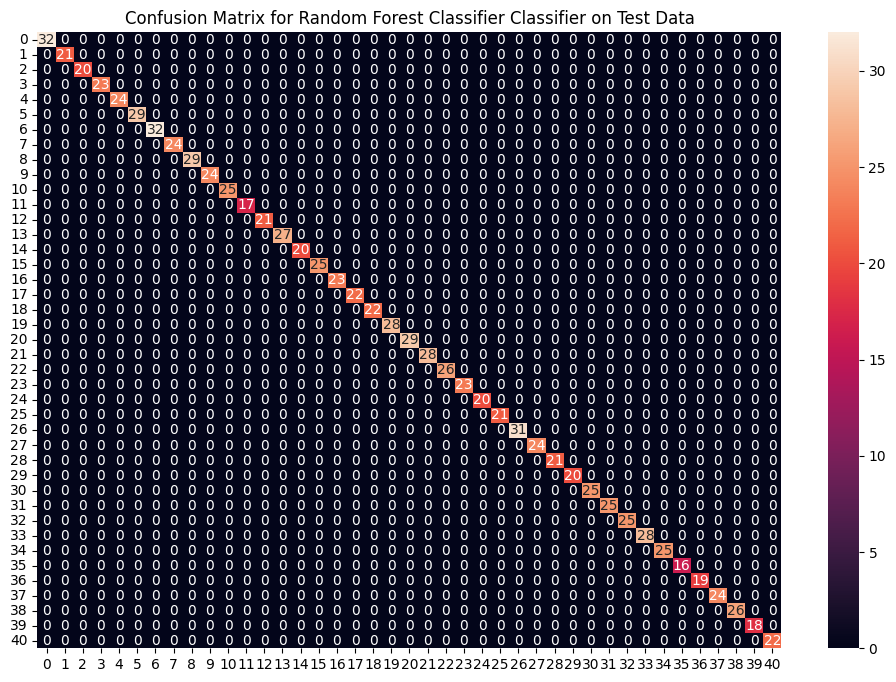

In [120]:
cf_matrix=confusion_matrix(Y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier Classifier on Test Data")

From the above confusion matrices, we can see that the models are performing very well on the unseen data. Now we will be training the models on the whole train data present in the dataset that we downloaded and then test our combined model on test data present in the dataset.

In [122]:
# Training the models on whole data
final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)

final_svm_model.fit(X,Y)
final_nb_model.fit(X,Y)
final_rf_model.fit(X,Y)


In [123]:
path='https://drive.google.com/uc?export=download&id=1gYY6lQBxSAYF6ZFRgvdC2g-_5v_DekLC'
test_data=pd.read_csv(path)

In [125]:
print(test_data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [126]:
encoder=LabelEncoder()
test_data["prognosis"]=encoder.fit_transform(test_data["prognosis"])

In [127]:
test_x=test_data.iloc[:,:-1]
test_y=test_data.iloc[:,-1]

In [129]:
print(test_y.head())

0    15
1     4
2    16
3     9
4    14
Name: prognosis, dtype: int64


In [131]:
svm_preds = final_svm_model.predict(test_x)
nb_preds = final_nb_model.predict(test_x)
rf_preds = final_rf_model.predict(test_x)

***Majority Voting:*** Use the mode function to combine the predictions from the three models. The final prediction for each instance is the most common prediction among the three models.

In [138]:
# Debugging: Print intermediate results
for i, j, k in zip(svm_preds, nb_preds, rf_preds):
    try:
        m = mode([i, j, k])
        print(f"Predictions: {i, j, k} -> Mode: {m.mode[0]}")
    except IndexError as e:
        print(f"IndexError for predictions {i, j, k}: {e}")

IndexError for predictions (15, 15, 15): invalid index to scalar variable.
IndexError for predictions (4, 4, 4): invalid index to scalar variable.
IndexError for predictions (16, 16, 16): invalid index to scalar variable.
IndexError for predictions (9, 9, 9): invalid index to scalar variable.
IndexError for predictions (14, 14, 14): invalid index to scalar variable.
IndexError for predictions (33, 33, 33): invalid index to scalar variable.
IndexError for predictions (1, 1, 1): invalid index to scalar variable.
IndexError for predictions (12, 12, 12): invalid index to scalar variable.
IndexError for predictions (17, 17, 17): invalid index to scalar variable.
IndexError for predictions (6, 6, 6): invalid index to scalar variable.
IndexError for predictions (23, 23, 23): invalid index to scalar variable.
IndexError for predictions (30, 30, 30): invalid index to scalar variable.
IndexError for predictions (7, 7, 7): invalid index to scalar variable.
IndexError for predictions (32, 32, 32):

In [139]:
# Calculate the final predictions using the mode and ensure proper handling
final_preds = []
for i, j, k in zip(svm_preds, nb_preds, rf_preds):
    try:
        m = mode([i, j, k])
        if isinstance(m.mode, np.ndarray) and len(m.mode) > 0:
            final_preds.append(m.mode[0])
        else:
            # Handle unexpected cases
            final_preds.append(i)  # or any other fallback strategy
    except Exception as e:
        print(f"Error for predictions {i, j, k}: {e}")
        final_preds.append(i)  # or any other fallback strategy

In [140]:
print(final_preds)

[15, 4, 16, 9, 14, 33, 1, 12, 17, 6, 23, 30, 7, 32, 28, 29, 8, 11, 37, 40, 19, 20, 21, 22, 3, 36, 10, 34, 13, 18, 39, 26, 24, 25, 31, 5, 0, 2, 38, 35, 27, 15]
